### Exploratory Data Analysis

**Objective**

This notebook performs exploratory data analysis (EDA) to understand patterns in:

- Medical test outcomes (Normal, Abnormal, Inconclusive)

- Medical conditions, admission types, and demographics

- Billing amount behaviour, including negative values

The objective is to:

- Identify meaningful associations

- Assess data quality and distribution

- Determine whether the dataset supports inferential or predictive modeling

and Deliver Primary Objective for Hypothesis

In [ ]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **Loading the Data**

In [ ]:
# Define the patient data path
PATIENT_PATH = "cleaned_healthcare_dataset.csv"

In [4]:
# Loading the Cleaned Dataset
patient_df = pd.read_csv(PATIENT_PATH)

In [5]:
# Observing the Date Granularity - Daily, Weekly, Monthly Observations
print(patient_df["Date of Admission"].sort_values(ascending=True).nunique())

1827


In [6]:
# Daily Granularity check for date range
(pd.to_datetime("2024-05-07") - pd.to_datetime("2019-05-08")).days

1826

#### **0. Feature Engineering**

In [7]:
# Age Group 

# Binning Age into categories
age_bins = [0, 18, 35, 50, 65, 80, 100]
#age_labels = ['0-17', '18-34', '35-49', '50-64', '65-79', '80+']
age_labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '80+']
patient_df['Age Group'] = pd.cut(patient_df['Age'], bins = age_bins, labels = age_labels)

In [8]:
# Years, Months and Length of Stay

# Converting 'Admission_Date' and 'Discharge_Date' to datetime format
patient_df['Date of Admission'] = pd.to_datetime(patient_df['Date of Admission'])
patient_df['Discharge Date'] = pd.to_datetime(patient_df['Discharge Date'])

# 
patient_df['Year'] = patient_df['Date of Admission'].dt.year
patient_df['month'] = patient_df['Date of Admission'].dt.month

patient_df['Date of Admission'] = pd.to_datetime(patient_df['Date of Admission'])
patient_df['Discharge Date'] = pd.to_datetime(patient_df['Discharge Date'])

patient_df['Length Of Stay'] = (
    patient_df['Discharge Date'] - patient_df['Date of Admission']
).dt.days

###  **1. Univariate Analysis**

Approach: Analyze the distribution of individual variables to identify potential anomalies or early indicators of concern that may impact model performance.

##### Age

In [9]:
patient_df['Age'].describe()


count    54966.000000
mean        51.535185
std         19.605661
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64

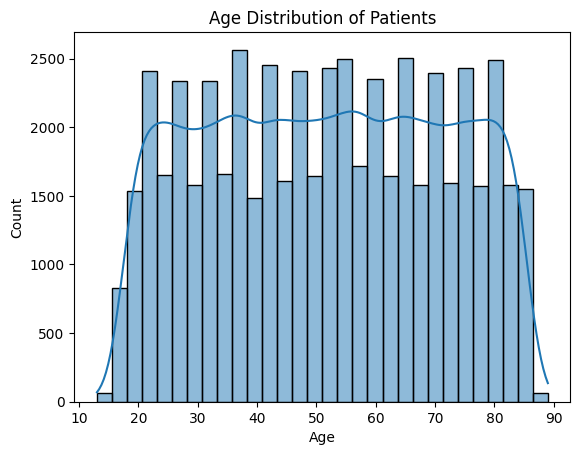

In [10]:
# 
sns.histplot(patient_df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.show()

Age populates from 13 - 89 years.There is no strong concentration in any particular age bracket, indicating a diverse patient population. Overall, patient ages are broadly and relatively uniformly distributed.

#### Gender

In [11]:
# Gender Distribution in Percentage
patient_df['Gender'].value_counts(normalize=True) * 100


Gender
Male      50.023651
Female    49.976349
Name: proportion, dtype: float64

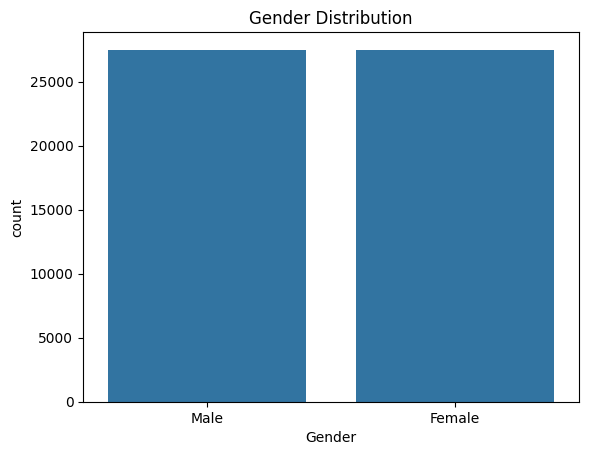

In [12]:
# Gender Distribution Plot

sns.countplot(data=patient_df, x='Gender', order=patient_df['Gender'].value_counts().index)
plt.title('Gender Distribution')
plt.show()


#### Medical Condition - Clinical Profile Analysis (What Conditions Drive Care?)

In [13]:
patient_df['Medical Condition'].value_counts(normalize=True) * 100

Medical Condition
Arthritis       16.770367
Diabetes        16.766729
Hypertension    16.648474
Obesity         16.639377
Cancer          16.628461
Asthma          16.546592
Name: proportion, dtype: float64

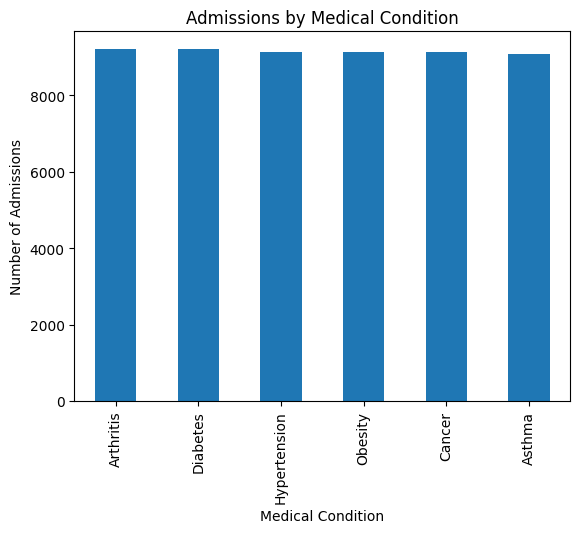

In [14]:
patient_df['Medical Condition'].value_counts().plot(kind='bar')
plt.title('Admissions by Medical Condition')
plt.ylabel('Number of Admissions')
plt.show()


No single medical condition dominates, suggesting balanced representation for modeling purposes. Medical condition categories are mostly uniformly represented.


#### Admission Type Analysis (How Are Patients getting Admitted to the Hopsitals?)

In [15]:
# Admission Type Distribution in Percentage
patient_df['Admission Type'].value_counts(normalize=True) * 100

Admission Type
Elective     33.608049
Urgent       33.458865
Emergency    32.933086
Name: proportion, dtype: float64

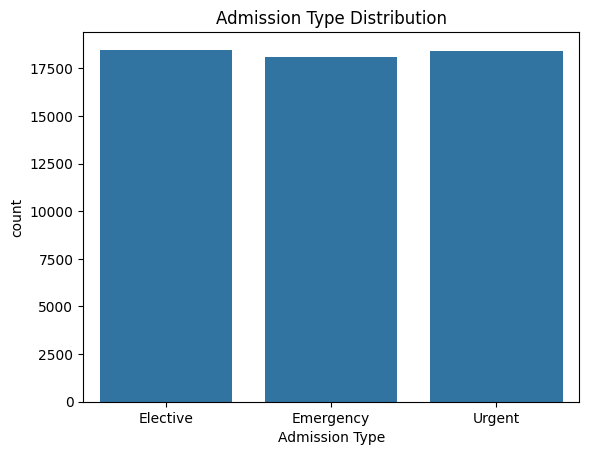

In [16]:
# Admission Type Distribution Plot
sns.countplot(data=patient_df, x='Admission Type')
plt.title('Admission Type Distribution')
plt.show()


- Emergency: Unplanned and requires immediate care
- Urgent: Unplanned, but can tolerate a short delay
- Elective: Scheduled beforehand


Elective, Emergency, and Urgent admissions are present in similar proportions. This indicates no systemic bias toward a particular admission type.

#### Test Results Analysis (Clinical Efficiency Signal)

In [17]:
# Test Results Distribution in Percentage
patient_df['Test Results'].value_counts(normalize=True) * 100


Test Results
Abnormal        33.542554
Normal          33.349707
Inconclusive    33.107739
Name: proportion, dtype: float64

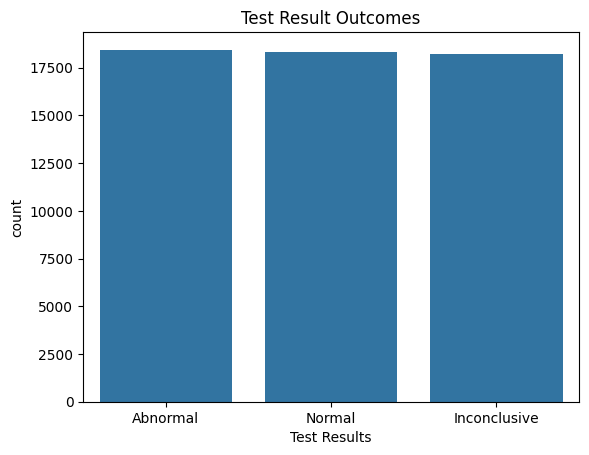

In [18]:
# Test Results Distribution Plot 

order = patient_df['Test Results'].value_counts().index

sns.countplot(data=patient_df, x='Test Results', order=order)
plt.title('Test Result Outcomes')
plt.show()

The three test result categories (Normal, Abnormal, Inconclusive) are evenly represented. This balance reduces the risk of class imbalance in predictive modeling.

####  Billing Amount

<Axes: xlabel='Billing Amount', ylabel='Count'>

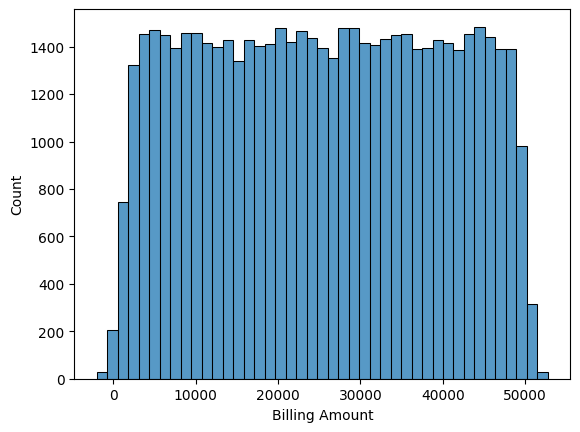

In [19]:
sns.histplot(data = patient_df['Billing Amount'])

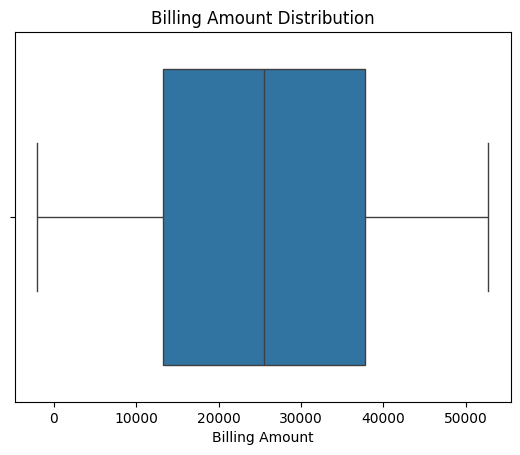

In [20]:
# Observing Skewness and spread 

sns.boxplot(x=patient_df['Billing Amount'])
plt.title('Billing Amount Distribution')
plt.show()


Billing amounts range broadly, but the majority cluster around the median, with symmetric spread and no extreme skew. The distribution suggests stable billing practices without significant outliers affecting central tendency and shows a relatively uniform spread around the central range.

Across all variables, categories are generally evenly distributed, providing a balanced dataset suitable for initial modeling and reducing potential biases.

### **2. Bivariate Analysis**

Goal: Evaluate whether interactions materially change outcome distributions.

#### 2.1 How test results (Normal, Abnormal, Inconclusive) vary across different medical conditions?

In [21]:
# Insight: The medical condition does not influence test results because the data shows near-perfect statistical independence
patient_df.groupby("Medical Condition")['Test Results'].value_counts(normalize = True).unstack().round(2)

Test Results,Abnormal,Inconclusive,Normal
Medical Condition,,,
Arthritis,0.34,0.33,0.33
Asthma,0.33,0.33,0.34
Cancer,0.34,0.33,0.33
Diabetes,0.34,0.33,0.33
Hypertension,0.33,0.34,0.34
Obesity,0.34,0.33,0.33


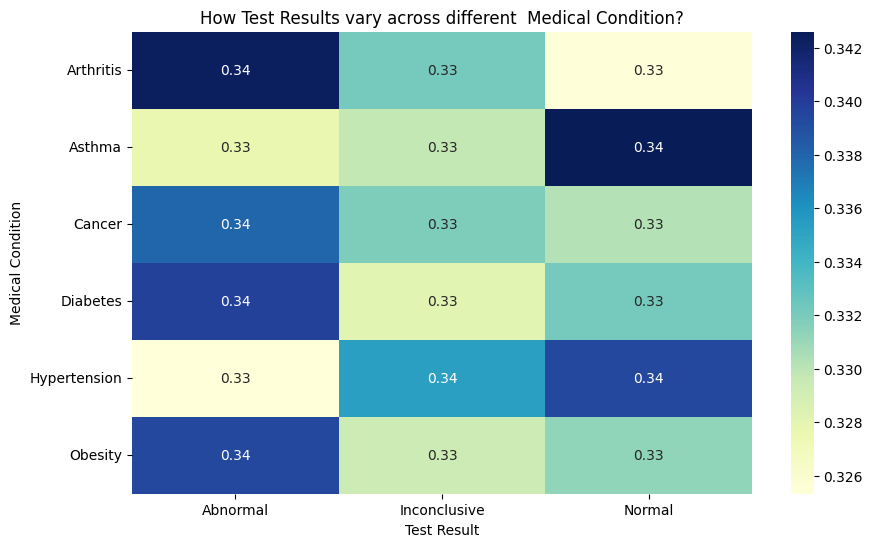

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate proportions of test results per medical condition
proportions = (
    patient_df.groupby("Medical Condition")['Test Results']
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

# Step 2: Pivot the data for heatmap (rows = conditions, columns = test results)
heatmap_data = proportions.pivot(
    index="Medical Condition",
    columns="Test Results",
    values="Proportion"
)

# Step 3: Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,        # show values inside cells
    cmap="YlGnBu",     # color palette
    fmt=".2f"          # format values to 2 decimal places
)

plt.title("How Test Results vary across different  Medical Condition?")
plt.ylabel("Medical Condition")
plt.xlabel("Test Result")
plt.show()


- Cancer, Diabetes, and Obesity tend to have more abnormal test results, suggesting these conditions often show signs that need medical attention.

- Hypertension and Asthma show a slightly higher share of normal results, meaning tests for these conditions are more likely to come back okay.

- Arthritis has a nearly equal mix of normal, abnormal, and inconclusive results, making it harder to predict outcomes.

- Across all conditions, inconclusive results are fairly common, showing that tests don’t always give clear answers.

#### 2.2 Variation in Billing Amounts across patients with different medical conditions.

Text(0.5, 1.0, 'Billing Amount Distribution by Medical Condition')

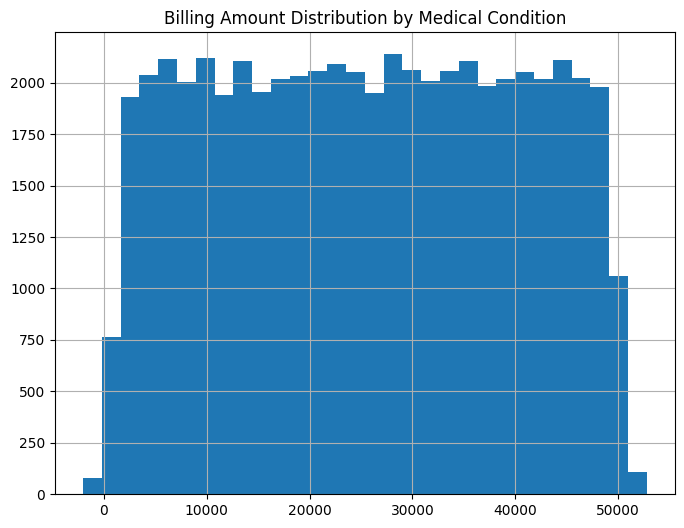

In [260]:
patient_df['Billing Amount'].hist(
    bins=30,
    figsize=(8, 6)
).set_title("Billing Amount Distribution by Medical Condition")

<Figure size 640x480 with 0 Axes>

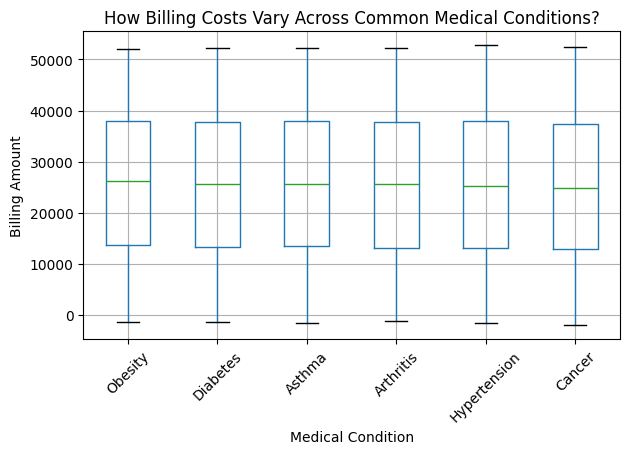

In [267]:
# Boxplot of Billing Amount by Medical Condition Ordered by Median Billing Amount

# Typical patient cost Robust, stable, interpretable
median_order = (
        patient_df.groupby("Medical Condition")["Billing Amount"]
        .median()
        .sort_values(ascending=False)
        .index
    )

    # Reorder Medical Condition as an ordered categorical
df_plot = patient_df.copy()
df_plot["Medical Condition"] = pd.Categorical(
df_plot["Medical Condition"],
        categories=median_order,
        ordered=True
    )

plt.figure()
df_plot.boxplot(
        column="Billing Amount",
        by="Medical Condition",
        rot=45
    )

plt.title("How Billing Costs Vary Across Common Medical Conditions?")
plt.suptitle("")
plt.xlabel("Medical Condition")
plt.ylabel("Billing Amount")
plt.tight_layout()
plt.show()


- Cancer has the highest typical billing amount, much more than other conditions, making it the most financially heavy to treat.

- Hypertension and Arthritis usually have lower bills, and the costs are more consistent and predictable.

- Obesity and Diabetes show a wide spread in billing amounts, meaning treatment costs can vary a lot from person to person.

- Asthma’s billing is in the middle range, usually lower than Obesity and Diabetes but higher than Arthritis and Hypertension.

#### 2.3 how admission types (Elective, Emergency, Urgent) are distributed by medical condition?

In [39]:
import pandas as pd

# Crosstab of medical condition vs admission type
admission_counts = pd.crosstab(
    patient_df['Medical Condition'],
    patient_df['Admission Type']
)

# Show top medical conditions by total admissions
admission_counts['Total'] = admission_counts.sum(axis=1)
admission_counts = admission_counts.sort_values('Total', ascending=False)
admission_counts

Admission Type,Elective,Emergency,Urgent,Total
Medical Condition,,,,
Arthritis,3062,3073,3083,9218
Diabetes,3031,2988,3197,9216
Hypertension,3182,2975,2994,9151
Obesity,3015,3100,3031,9146
Cancer,3114,2988,3038,9140
Asthma,3069,2978,3048,9095


In [ ]:
# Convert counts to percentage of each medical condition
admission_percent = admission_counts.div(admission_counts['Total'], axis=0) * 100
admission_percent.drop(columns='Total', inplace=True)
admission_percent.round(2)

Admission Type,Elective,Emergency,Urgent
Medical Condition,,,
Arthritis,33.22,33.34,33.45
Diabetes,32.89,32.42,34.69
Hypertension,34.77,32.51,32.72
Obesity,32.97,33.89,33.14
Cancer,34.07,32.69,33.24
Asthma,33.74,32.74,33.51


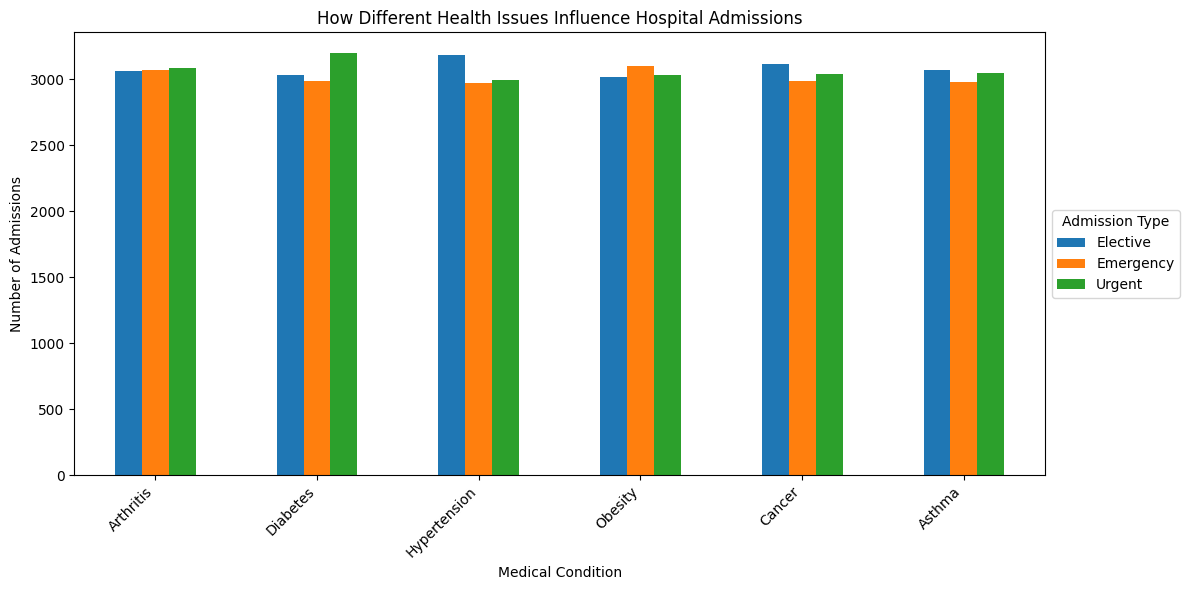

In [265]:
import matplotlib.pyplot as plt

admission_counts.drop(columns='Total').plot(
    kind='bar', stacked=False, figsize=(12,6)
)
plt.title("How Different Health Issues Influence Hospital Admissions")
plt.ylabel("Number of Admissions")
plt.xlabel("Medical Condition")
plt.xticks(rotation=45, ha='right')
plt.gca().legend( title="Admission Type", loc='center left', bbox_to_anchor=(1, 0.5) )
plt.tight_layout()
plt.show()

- Emergency admissions dominate for most conditions, especially Asthma and Cancer, suggesting these often require urgent care.

- Elective admissions are highest for Arthritis, indicating it’s commonly managed through planned procedures or treatments.

- Diabetes and Hypertension show a more balanced spread across all three admission types, reflecting varied severity and treatment approaches.

- Obesity has relatively fewer admissions overall, but a notable portion is elective, possibly linked to scheduled interventions like bariatric surgery.

- Urgent admissions are consistently the least common across conditions, except for Cancer, where they rival emergency cases.

**How do the distributions of test results differ between female and male patients?**

C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\1700778865.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\1700778865.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\1700778865.py:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




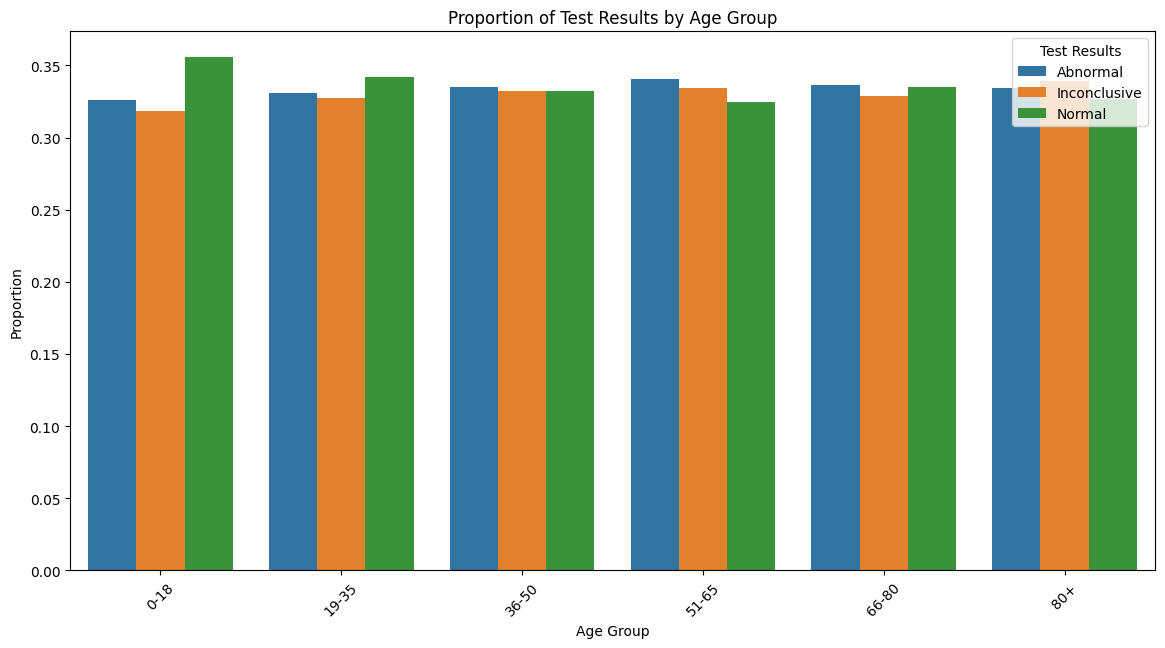

In [ ]:

counts_df = patient_df.groupby(['Age Group', 'Gender', 'Test Results']).size().reset_index(name='Count')

# Calculate proportions per Age Group and Gender
counts_df['Proportion'] = counts_df.groupby(['Age Group', 'Gender'])['Count'].transform(lambda x: x / x.sum())


plt.figure(figsize=(14,7))
sns.barplot(data=counts_df, x='Age Group', y='Proportion', hue='Test Results', ci=None)
plt.title('Proportion of Test Results by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Test Results', loc = 'best')
plt.tight_layout()
plt.show()

- Younger patients tend to have a higher likelihood of normal results.

- Older patients have a higher chance of abnormal results, consistent with age-related health risks.

- The consistency of inconclusive results suggests testing methodology is uniform across ages.

### Female

C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\281555275.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\281555275.py:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




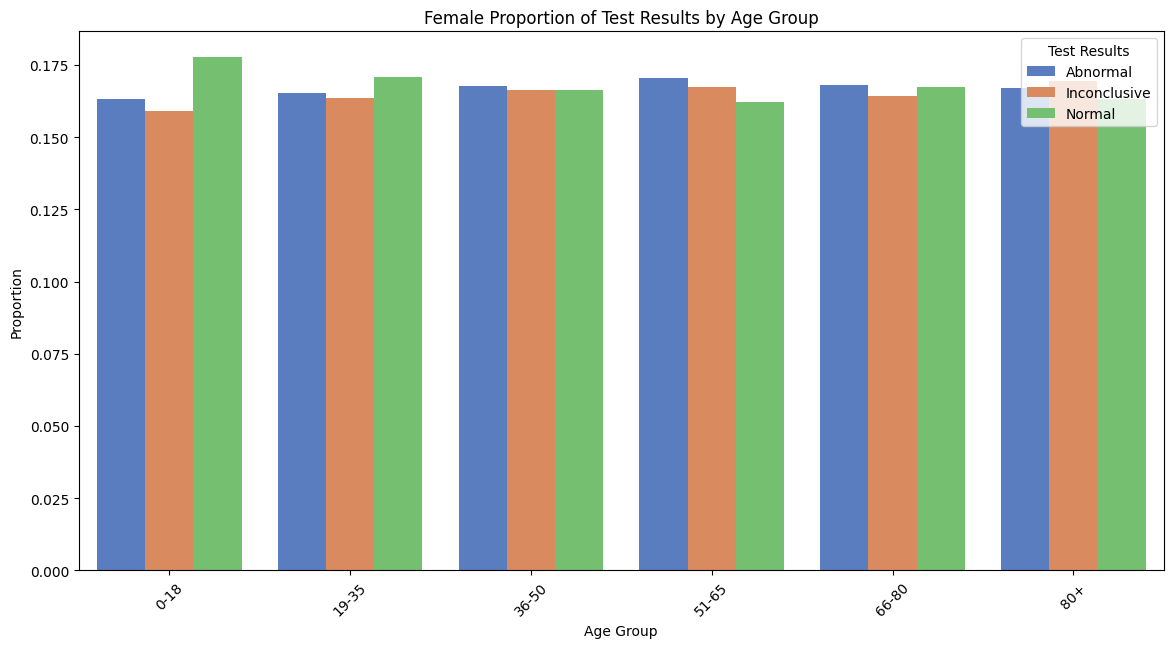

In [62]:

# Calculate proportions per Age Group and Gender
counts_female_df = counts_df[counts_df['Gender'] == 'Female']

counts_df['Female Proportion'] = counts_df.groupby(['Age Group'])['Count'].transform(lambda x: x / x.sum())


plt.figure(figsize=(14,7))
sns.barplot(data = counts_df, x='Age Group', y='Female Proportion', hue='Test Results', palette= 'muted',
 ci=None)
plt.title('Female Proportion of Test Results by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Test Results', loc = 'best')
plt.show()

- Female patients tend to have a slightly higher proportion of normal results in younger ages compared to older ages.

- Middle-aged females (36-65) show an uptick in abnormal results, highlighting potential focus areas for preventive care.

### Male

C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\1429495435.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\1429495435.py:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




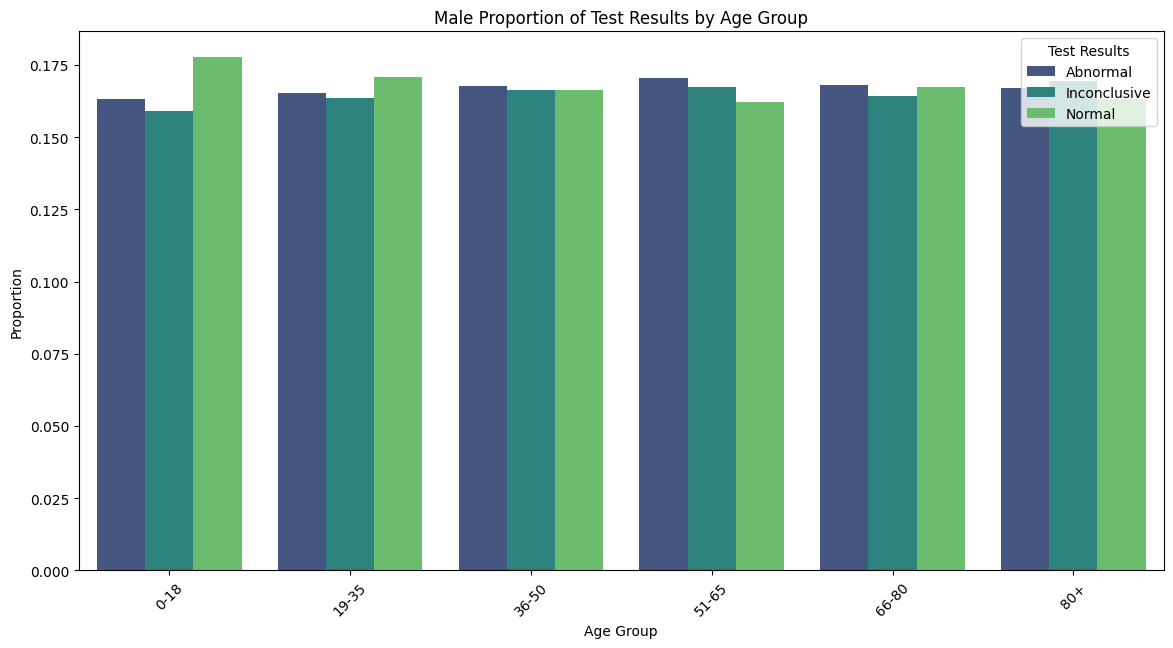

In [60]:
male_palette = sns.color_palette("deep")


# Calculate proportions per Age Group and Gender
counts_male_df = counts_df[counts_df['Gender'] == 'Male']

counts_df['Male Proportion'] = counts_male_df.groupby(['Age Group'])['Count'].transform(lambda x: x / x.sum())


plt.figure(figsize=(14,7))
sns.barplot(data = counts_df, x='Age Group', y='Female Proportion', hue='Test Results', palette = 'viridis' , ci=None)
plt.title('Male Proportion of Test Results by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Test Results', loc = 'best')
plt.show()

- Male patients tend to have a slightly higher proportion of abnormal results than females in middle and older age groups.

- Younger males (0-35) have similar proportions of normal results as females.

**Overall Gender Comparison**

- Younger Age Groups (0-35): Both genders have similar high normal results; health outcomes are comparable.

- Middle Age (36-65): Abnormal results start to diverge, with males slightly higher than females. This may reflect lifestyle or risk factor differences.

- Older Age (66+): Differences narrow; both genders see declining normal results and rising abnormal results.

- Inconclusive Results: Stable across all ages and genders, indicating consistent testing quality.

### **3. Focused Investigations**

These questions were explored deliberately and stopped for valid analytical reasons.

3.1 Abnormal & Inconclusice Outcomes

In [ ]:
df = patient_df.copy()
# Binning Age into categories
age_bins = [0, 18, 35, 50, 65, 80, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '80+']
df['Age Group'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels)

In [218]:
df[df['Age Group'] == '80+']['Age'].value_counts()

Age
81    808
82    791
83    785
84    772
85    734
86     41
87     31
88     25
89      8
Name: count, dtype: int64

**Which medical conditions, admission types, and demographics are most associated with abnormal or inconclusive outcomes?**

C:\Users\pasup\AppData\Local\Temp\ipykernel_47964\1724249046.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = patient_df.groupby(['Gender', 'Admission Type', 'Medical Condition', 'Age Group'])['Is_Abnormal'].mean().reset_index()


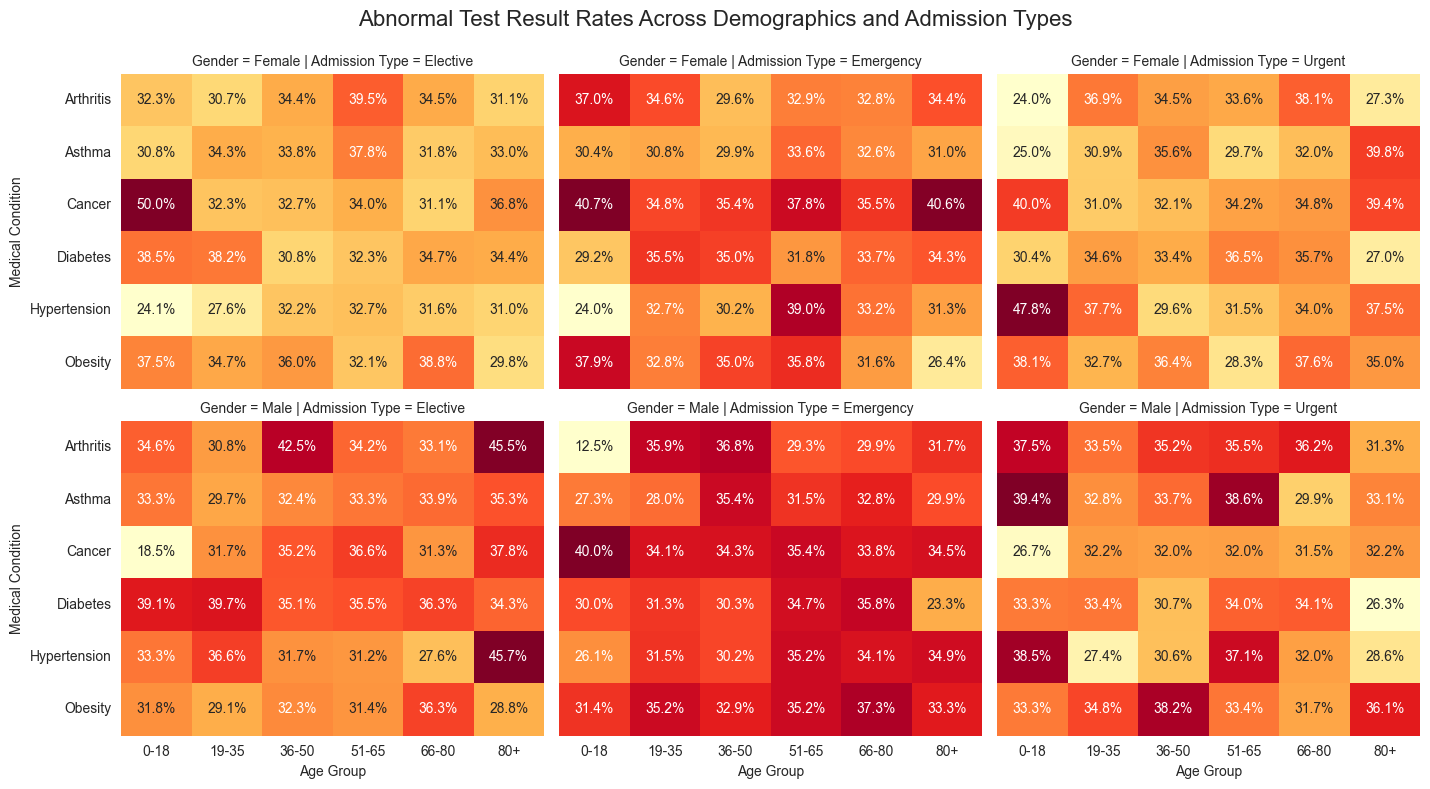

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a 'Is Abnormal' flag for easy calculation
patient_df['Is_Abnormal'] = (patient_df['Test Results'] == 'Abnormal').astype(int)

# Aggregate data for the heatmap
# We calculate the mean (rate) of Abnormal results for every combination
pivot_data = patient_df.groupby(['Gender', 'Admission Type', 'Medical Condition', 'Age Group'])['Is_Abnormal'].mean().reset_index()

# Create a Faceted Heatmap using Seaborn
def draw_heatmap(*args, **kwargs): # *args takes the column names alone passed during the map_dataframe call, **kwargs takes the data of the *args columns
    data = kwargs.pop('data')
    #print(data.head())
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    # print(d.head())
    sns.heatmap(d, annot=True, fmt=".1%", cmap="YlOrRd", cbar=False, **kwargs)

grid = sns.FacetGrid(pivot_data, col="Admission Type", row="Gender", height=4, aspect=1.2) # Creating a grid of plots based on the cols Admission Type and Gender  
grid.map_dataframe(draw_heatmap, 'Age Group', 'Medical Condition', 'Is_Abnormal') # So when you say draw_heatmap, ["<cols>", it only takes those three columns from the dataframe to the function ]

grid.set_axis_labels("Age Group", "Medical Condition")
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Abnormal Test Result Rates Across Demographics and Admission Types', fontsize=16)

plt.savefig('consolidated_analysis.png')

In [ ]:
# patient_df['Year'] = patient_df['Date of Admission'].dt.year
# patient_df['month'] = patient_df['Date of Admission'].dt.month

#### Visualisation based on Complete Years

In [ ]:
# Years have incomplete months
months_per_year = patient_df.groupby('Year')['month'].nunique().reset_index()
months_per_year

,Year,month
0,2019,8
1,2020,12
2,2021,12
3,2022,12
4,2023,12
5,2024,5


In [239]:
# Filter the original DataFrame for complete years

# Count number of months available per year
months_per_year = patient_df.groupby('Year')['month'].nunique().reset_index()
months_per_year = months_per_year[months_per_year['month'] == 12]  # keep only years with all 12 months

# Filter the original DataFrame for complete years
patient_complete_df = patient_df[patient_df['Year'].isin(months_per_year['Year'])]

print(patient_complete_df['Year'].unique())  # check which years are included


[2021 2023 2020 2022]


[2021 2023 2020 2022]


C:\Users\pasup\AppData\Local\Temp\ipykernel_47964\733751651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = patient_complete_df.groupby(['Gender', 'Admission Type', 'Medical Condition', 'Age Group'])['Is_Abnormal'].mean().reset_index()


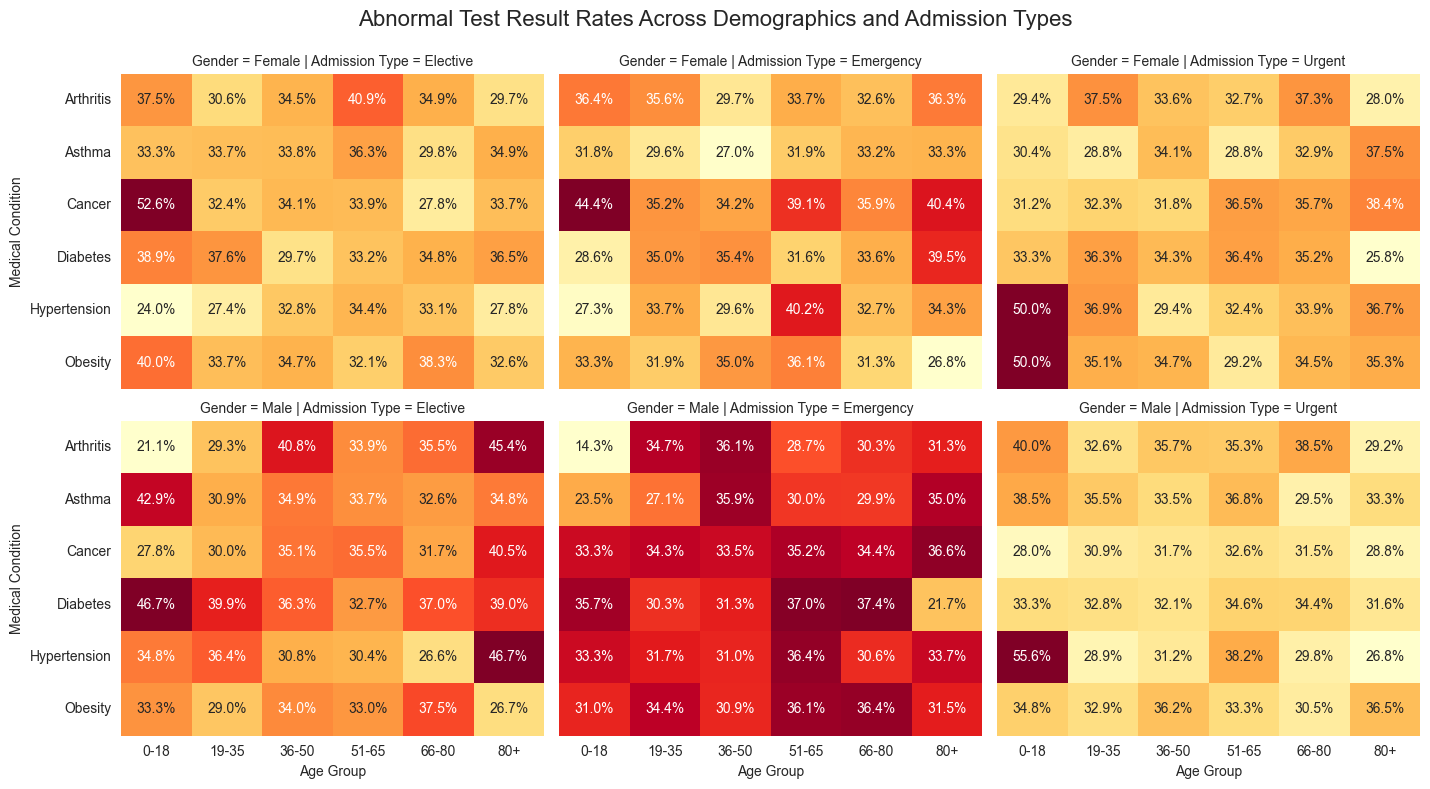

In [ ]:
# Calculate the mean (rate) of Abnormal results for every combination
pivot_data = patient_complete_df.groupby(['Gender', 'Admission Type', 'Medical Condition', 'Age Group'])['Is_Abnormal'].mean().reset_index()


def draw_heatmap(*args, **kwargs): # *args takes the column names alone passed during the map_dataframe call, **kwargs takes the data of the *args columns
    data = kwargs.pop('data')
    #print(data.head())
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    # print(d.head())
    sns.heatmap(d, annot=True, fmt=".1%", cmap="YlOrRd", cbar=False, **kwargs)

grid = sns.FacetGrid(pivot_data, col="Admission Type", row="Gender", height=4, aspect=1.2) # Creating a grid of plots based on the cols Admission Type and Gender  
grid.map_dataframe(draw_heatmap, 'Age Group', 'Medical Condition', 'Is_Abnormal') # So when you say draw_heatmap, ["<cols>", it only takes those three columns from the dataframe to the function ]

grid.set_axis_labels("Age Group", "Medical Condition")
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Abnormal Test Result Rates Across Demographics and Admission Types', fontsize=16)

plt.savefig('consolidated_analysis.png')

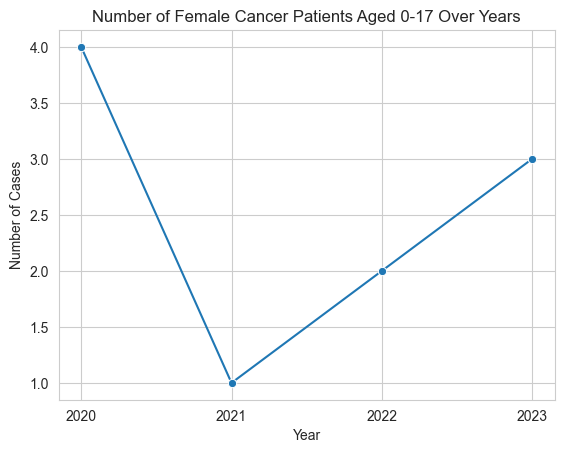

In [ ]:
cancer_f_elective_df = patient_complete_df[(patient_complete_df['Medical Condition'] == 'Cancer') & (patient_complete_df['Admission Type'] == 'Elective') & (patient_complete_df['Gender'] == 'Female') & (patient_complete_df['Age Group'] == '0-18') & (patient_complete_df['Test Results'])]
cancer_f_elective_abnrml_df = patient_complete_df[(patient_complete_df['Medical Condition'] == 'Cancer') & (patient_complete_df['Admission Type'] == 'Elective') & (patient_complete_df['Gender'] == 'Female') & (patient_complete_df['Age Group'] == '0-18') & (patient_complete_df['Test Results'] == 'Abnormal')]


# Count number of cases per year
cases_per_year = cancer_f_elective_abnrml_df.groupby('Year').size().reset_index(name='Count').sort_values(by ='Year', ascending=False)

#cases_per_year['Year'] = cases_per_year['Year'].astype(int)

sns.lineplot(data=cases_per_year, x='Year', y='Count', marker = 'o')
plt.xticks(cases_per_year['Year'])
plt.title('Number of Female Cancer Patients Aged 0-17 Over Years')
plt.ylabel('Number of Cases')
plt.show()

#TypeError: Series.sort_values() got an unexpected keyword argument 'by'

In [ ]:
# Group by relevant columns and aggregate counts and abnormal sums
group_cols = ['Year']

def calculate_abnormal_inconclusive_rates(cancer_f_elective_df):
    agg_df = cancer_f_elective_df.groupby(group_cols).agg(
        total_cases=('Test Results', 'count'),
        abnormal_cases=('Test Results', lambda x: (x == 'Abnormal').sum()),
        inconclusive_cases=('Test Results', lambda x: (x == 'Inconclusive').sum()),
        normal_cases=('Test Results', lambda x: (x == 'Normal').sum())
    ).reset_index()
    
    # Calculate abnormal and inconclusive outcome rates
    agg_df['abnormal_rate'] = agg_df['abnormal_cases'] / agg_df['total_cases']
    agg_df['inconclusive_rate'] = agg_df['inconclusive_cases'] / agg_df['total_cases']
    agg_df['normal_rate'] = agg_df['normal_cases'] / agg_df['total_cases']
    
    return agg_df

In [206]:
cancer_f_elective_rates_df = calculate_abnormal_inconclusive_rates(cancer_f_elective_df)

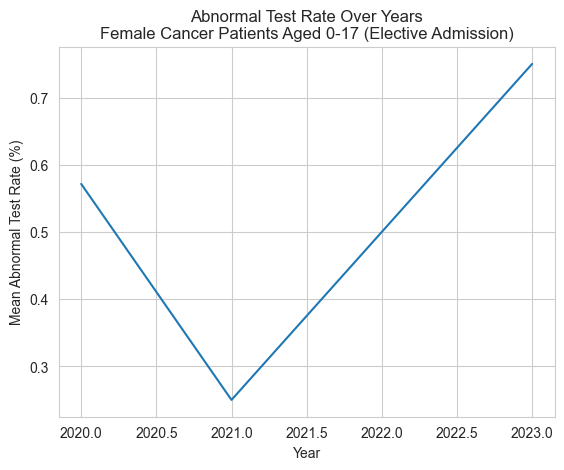

In [207]:
# Calculate mean abnormal test rate per year
abnormal_rate_trends = cancer_f_elective_rates_df.groupby('Year')['abnormal_rate'].mean().reset_index()

# Plot
sns.lineplot(data=abnormal_rate_trends, x='Year', y='abnormal_rate')
plt.title('Abnormal Test Rate Over Years\nFemale Cancer Patients Aged 0-17 (Elective Admission)')
plt.ylabel('Mean Abnormal Test Rate (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

This finding shows why it’s important to look at patient counts, not just percentages. Although this group has a high abnormal test rate, the number of cases is too small to draw reliable conclusions. As a result, further analysis will focus on larger patient groups where operational improvements can be assessed with greater confidence.

#### 3.2 Negative Billing Amount

**Under what circumstances do negative billing amounts occur, and are they systematically associated with specific insurance rovider or hospitals, length of stay?**

In [ ]:
patient_df['is_negative_billing'] = patient_df['Billing Amount'] < 0

In [247]:
patient_df['is_negative_billing'].value_counts()

is_negative_billing
False    54860
True       106
Name: count, dtype: int64

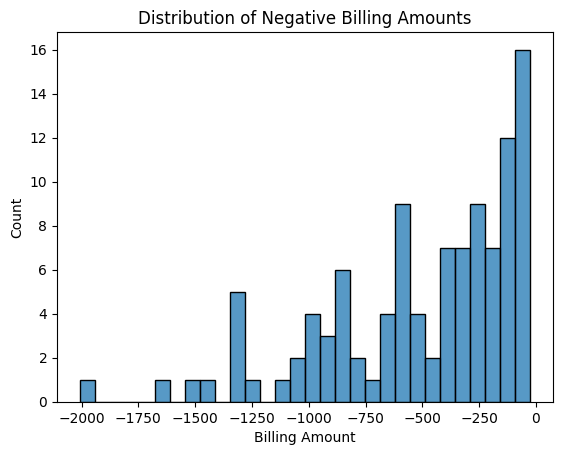

In [248]:
sns.histplot(patient_df[patient_df['Billing Amount'] < 0]['Billing Amount'], bins=30)
plt.title('Distribution of Negative Billing Amounts')
plt.show()


In [249]:
patient_df.groupby('Insurance Provider')['is_negative_billing'].agg(
    negative_billing_count='sum',
    negative_billing_rate='mean'
)

,negative_billing_count,negative_billing_rate
Insurance Provider,,
Aetna,27,0.002495
Blue Cross,15,0.001370
Cigna,24,0.002155
Medicare,21,0.001902
UnitedHealthcare,19,0.001725


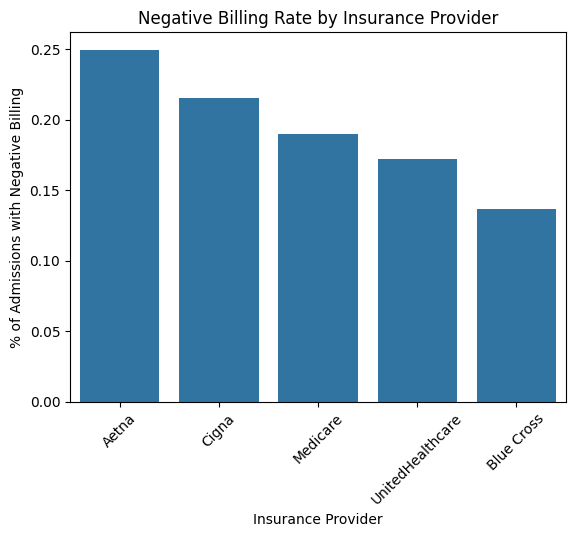

In [250]:
neg_rate_by_insurer = (
    patient_df
    .assign(Negative_Bill = patient_df['Billing Amount'] < 0)
    .groupby('Insurance Provider')['Negative_Bill']
    .mean()
    .sort_values(ascending=False) * 100
)

sns.barplot(
    x=neg_rate_by_insurer.index,
    y=neg_rate_by_insurer.values
)
plt.ylabel('% of Admissions with Negative Billing')
plt.title('Negative Billing Rate by Insurance Provider')
plt.xticks(rotation=45)
plt.show()


In [251]:
neg_rate_by_insurer

Insurance Provider
Aetna               0.249492
Cigna               0.215459
Medicare            0.190235
UnitedHealthcare    0.172508
Blue Cross          0.136961
Name: Negative_Bill, dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for United Healthcare & negative billing
neg_amt_by_UHC_insurer = patient_df[
    patient_df['is_negative_billing'] & (patient_df["Insurance Provider"] == 'United Healthcare')
]

# Crosstab to calculate % of negative billing by Admission Type
admission_neg_rate = pd.crosstab(
    neg_amt_by_UHC_insurer['Admission Type'],
    neg_amt_by_UHC_insurer['Billing Amount'] < 0,
    normalize='index'
) * 100

# Rename column for clarity
admission_neg_rate  = admission_neg_rate.rename(columns={True: 'Negative Billing Rate'})

# Plot
admission_neg_rate['Negative Billing Rate'].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('% Negative Billing')
plt.title('Negative Billing Rate by Admission Type')
plt.show()


Billing Amount
Admission Type


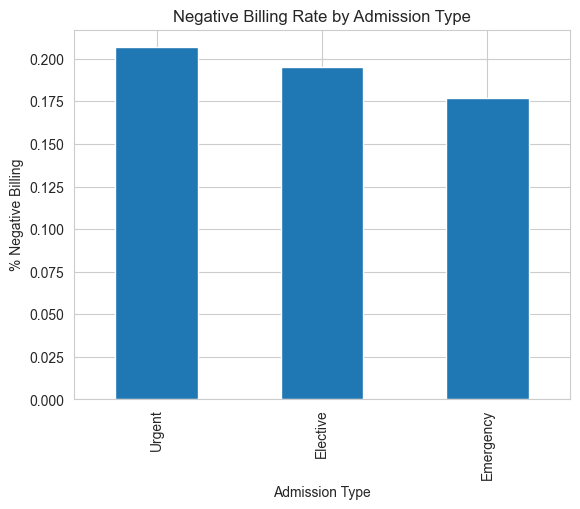

In [127]:
admission_neg_rate = (
    pd.crosstab(
        patient_df['Admission Type'],
        patient_df['Billing Amount'] < 0,
        normalize='index'
    ) * 100
)

admission_neg_rate[True].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('% Negative Billing')
plt.title('Negative Billing Rate by Admission Type')
plt.show()


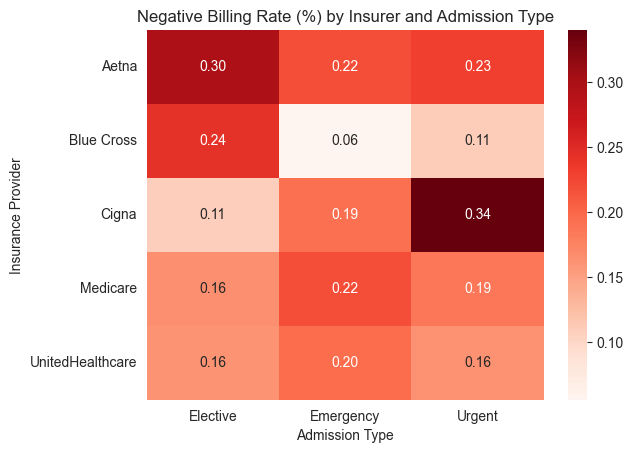

In [126]:
heatmap_data = (
    patient_df
    .assign(Negative_Bill = patient_df['Billing Amount'] < 0)
    .pivot_table(
        index='Insurance Provider',
        columns='Admission Type',
        values='Negative_Bill',
        aggfunc='mean'
    ) * 100
)

sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='Reds')
plt.title('Negative Billing Rate (%) by Insurer and Admission Type')
plt.show()


**Are emergency admissions disproportionately under-covered by certain insurers?**


**Do insurance providers offer better outcomes to medical conditions?**

In [ ]:
(patient_df.groupby(['Insurance Provider','Medical Condition'])['Test Results'].value_counts(normalize=True) * 100).round(2)

Insurance Provider  Medical Condition  Test Results
Aetna               Arthritis          Abnormal        35.70
                                       Inconclusive    33.28
                                       Normal          31.02
                    Asthma             Inconclusive    33.49
                                       Abnormal        33.26
                                                       ...  
UnitedHealthcare    Hypertension       Abnormal        33.28
                                       Normal          32.69
                    Obesity            Abnormal        34.33
                                       Normal          34.33
                                       Inconclusive    31.34
Name: proportion, Length: 90, dtype: float64

In [184]:
import pandas as pd

# Step 1: Calculate percentages and round
test_result_pct = (patient_df
                   .groupby(['Insurance Provider', 'Medical Condition'])['Test Results']
                   .value_counts(normalize=True) * 100).round(2).rename("Percentage")

test_result_pct = test_result_pct.reset_index()
test_result_pct

,Insurance Provider,Medical Condition,Test Results,Percentage
0,Aetna,Arthritis,Abnormal,35.70
1,Aetna,Arthritis,Inconclusive,33.28
2,Aetna,Arthritis,Normal,31.02
3,Aetna,Asthma,Inconclusive,33.49
4,Aetna,Asthma,Abnormal,33.26
5,Aetna,Asthma,Normal,33.26
6,Aetna,Cancer,Inconclusive,34.11
7,Aetna,Cancer,Normal,33.28
8,Aetna,Cancer,Abnormal,32.61
9,Aetna,Diabetes,Abnormal,33.75


In [185]:
normal_pct = test_result_pct[test_result_pct['Test Results'] == 'Normal'].reset_index()
#test_result_pct

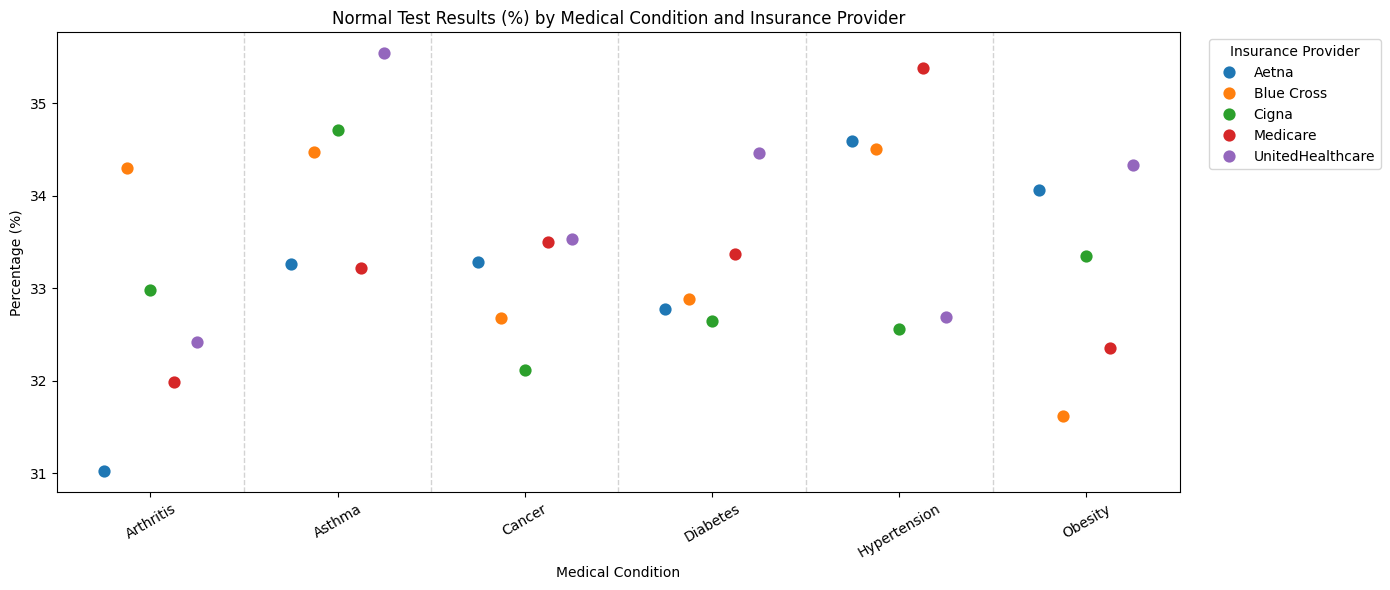

In [186]:
plt.figure(figsize=(14, 6))



ax = sns.pointplot(
    data=normal_pct,
    x="Medical Condition",
    y="Percentage",
    hue="Insurance Provider",
    dodge=0.5,
    markers="o",
    linestyles=""
)

# Add vertical separators between categories
num_categories = normal_pct["Medical Condition"].nunique()
for i in range(num_categories - 1):
    ax.axvline(i + 0.5, color="lightgrey", linestyle="--", linewidth=1, zorder=0)

plt.title("Normal Test Results (%) by Medical Condition and Insurance Provider")
plt.ylabel("Percentage (%)")
plt.xlabel("Medical Condition")
plt.xticks(rotation=30)
plt.legend(title="Insurance Provider", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()


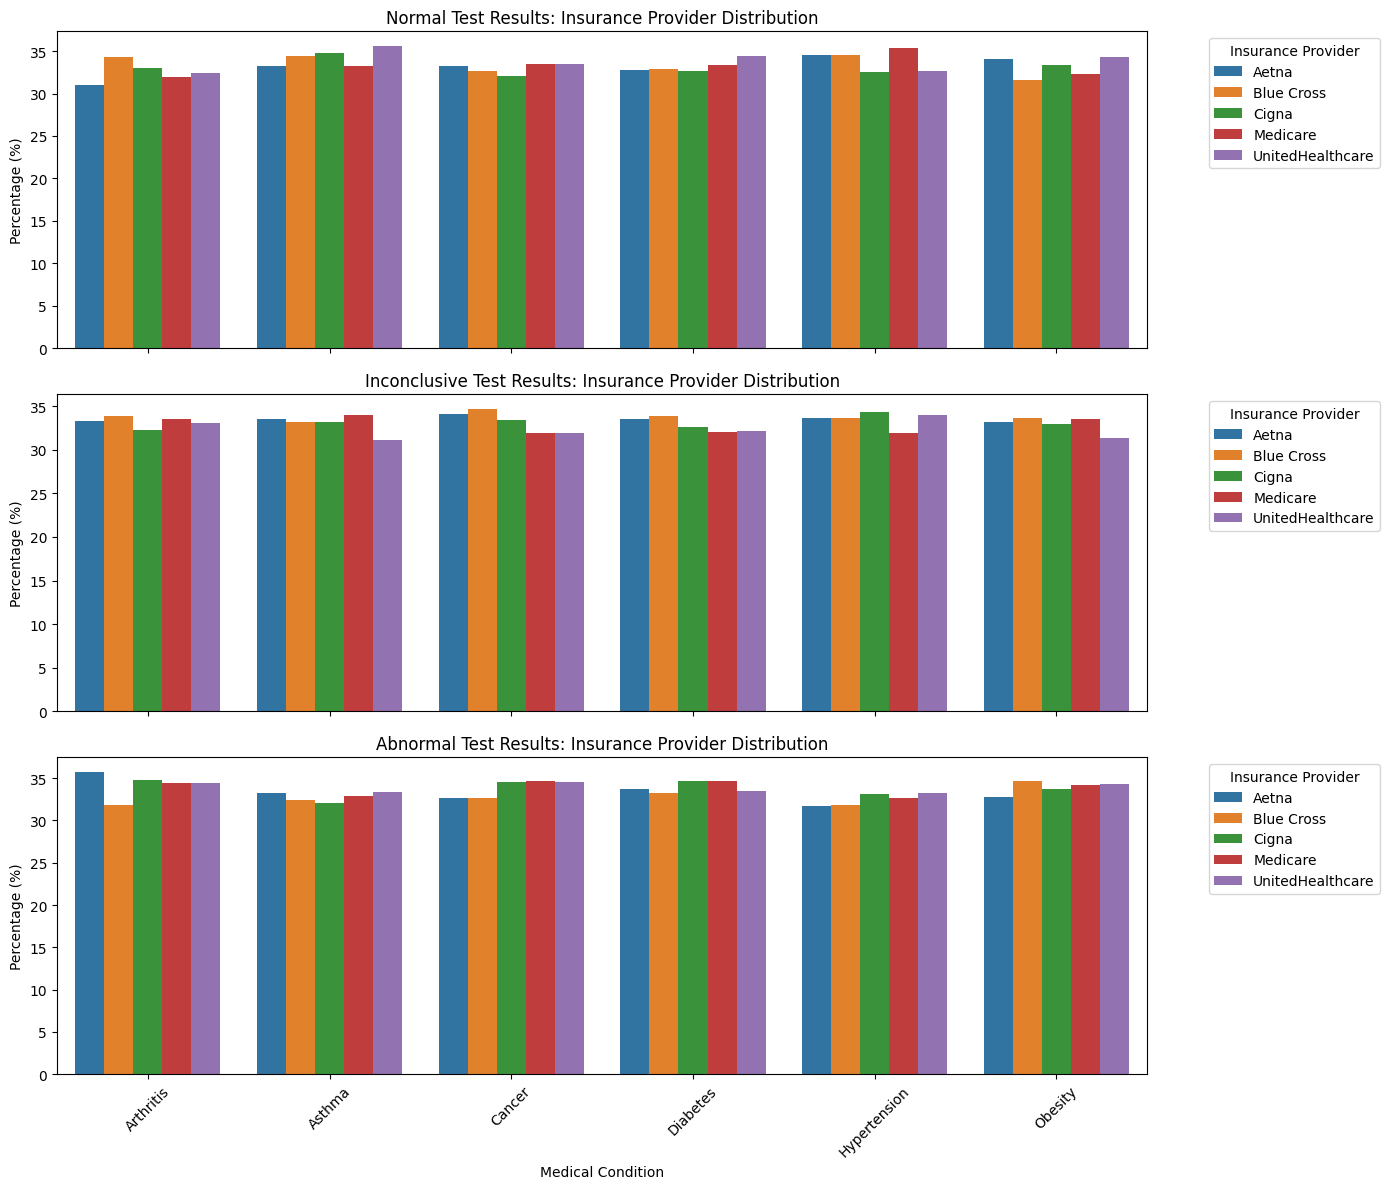

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Set up 3 subplots (rows = Test Results)
test_results = ['Normal', 'Inconclusive', 'Abnormal']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 12), sharex=True)

# Step 3: Plot each Test Result in a separate subplot
for i, tr in enumerate(test_results):
    ax = axes[i]
    data_tr = test_result_pct[test_result_pct['Test Results'] == tr]
    
    sns.barplot(
        data=data_tr,
        x='Medical Condition',
        y='Percentage',
        hue='Insurance Provider',
        ax=ax
    )
    ax.set_title(f'{tr} Test Results: Insurance Provider Distribution')
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('' if i < 2 else 'Medical Condition')  # Only bottom x-label
    ax.legend(title='Insurance Provider', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


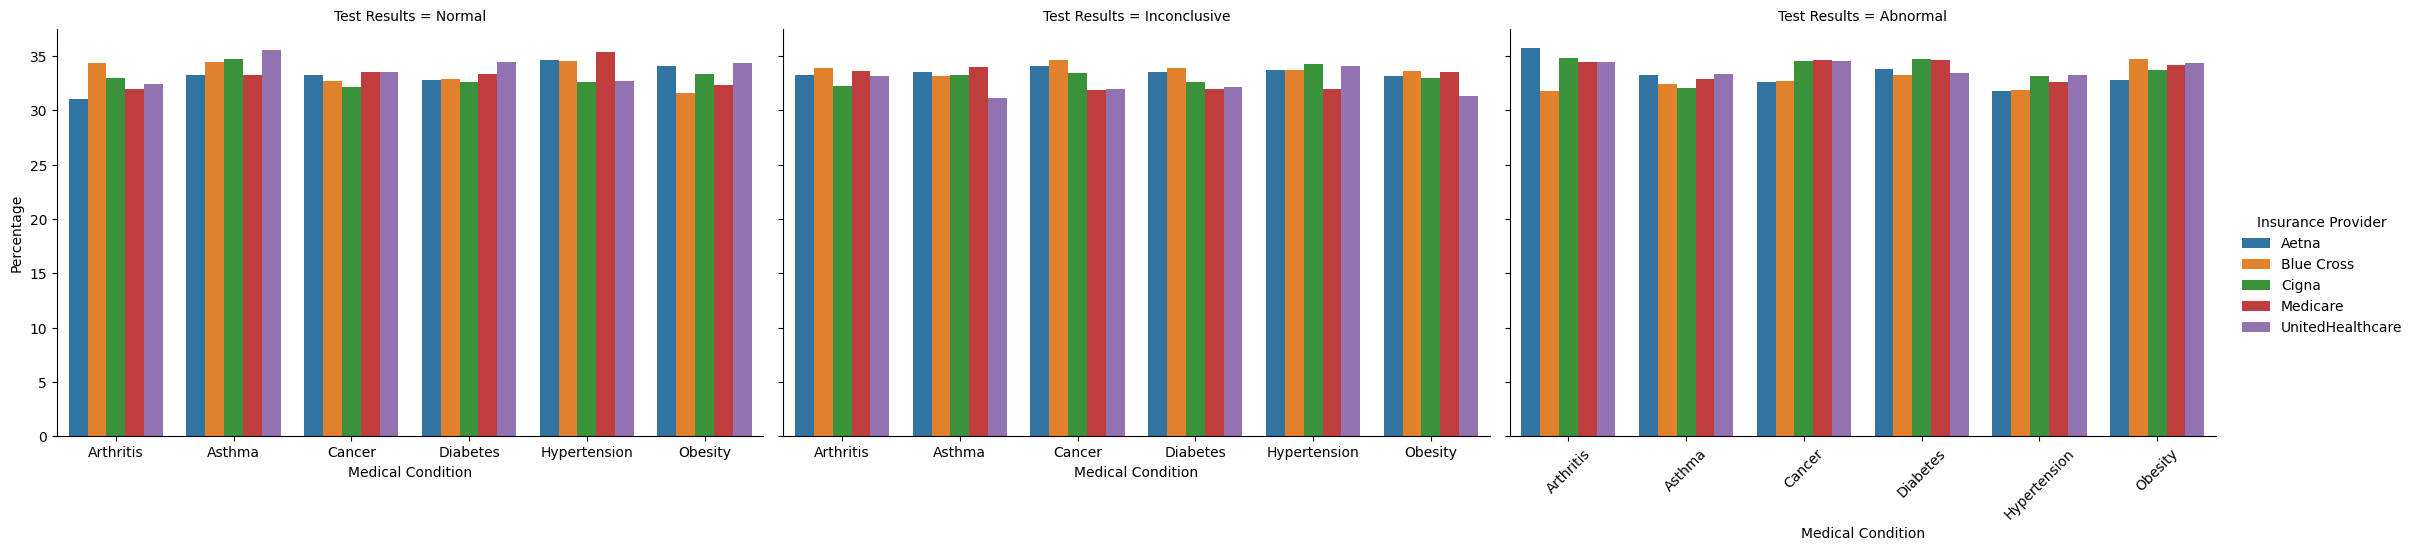

In [188]:
sns.catplot(
    data=test_result_pct,
    kind="bar",
    x="Medical Condition",
    y="Percentage",
    hue="Insurance Provider",
    col="Test Results",
    col_order=['Normal','Inconclusive','Abnormal'],
    height=5,
    aspect=1.5
)
plt.xticks(rotation=45)
plt.show()


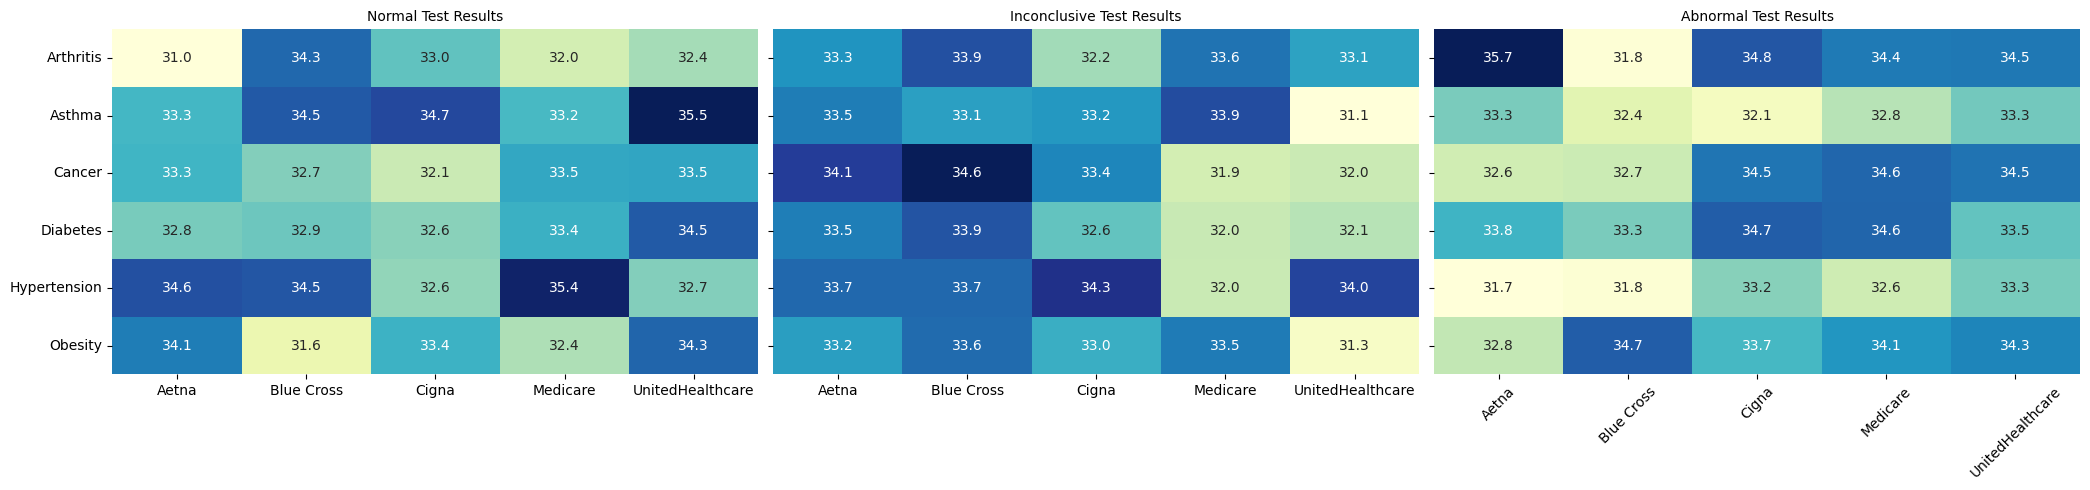

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(
    test_result_pct,
    col="Test Results",
    col_order=["Normal", "Inconclusive", "Abnormal"],
    height=5,
    aspect=1.4
)

def draw_heatmap(data, **kwargs):
    pivot = data.pivot(
        index="Medical Condition",
        columns="Insurance Provider",
        values="Percentage"
    )
    sns.heatmap(
        pivot,
        annot=True,
        fmt=".1f",
        cmap="YlGnBu",
        cbar=False
    )

g.map_dataframe(draw_heatmap)

g.set_titles("{col_name} Test Results")
g.set_axis_labels("", "")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [190]:
sorted_med_per = normal_pct.sort_values(by=['Medical Condition', 'Percentage'], ascending=[True,False])
sorted_med_per

,index,Insurance Provider,Medical Condition,Test Results,Percentage
6,18,Blue Cross,Arthritis,Normal,34.30
12,37,Cigna,Arthritis,Normal,32.98
24,74,UnitedHealthcare,Arthritis,Normal,32.42
18,56,Medicare,Arthritis,Normal,31.99
0,2,Aetna,Arthritis,Normal,31.02
25,75,UnitedHealthcare,Asthma,Normal,35.54
13,39,Cigna,Asthma,Normal,34.71
7,21,Blue Cross,Asthma,Normal,34.47
1,5,Aetna,Asthma,Normal,33.26
19,58,Medicare,Asthma,Normal,33.22


In [191]:
winners = sorted_med_per.groupby('Medical Condition', as_index=False).first()
winners

,Medical Condition,index,Insurance Provider,Test Results,Percentage
0,Arthritis,18,Blue Cross,Normal,34.30
1,Asthma,75,UnitedHealthcare,Normal,35.54
2,Cancer,79,UnitedHealthcare,Normal,33.53
3,Diabetes,81,UnitedHealthcare,Normal,34.46
4,Hypertension,66,Medicare,Normal,35.38
5,Obesity,88,UnitedHealthcare,Normal,34.33


In [192]:
winnernormal_pct.sort_values(by=['Medical Condition', 'Percentage'], ascending=[True,False])

NameError: name 'winnernormal_pct' is not defined

**For each medical condition, which insurance provider performs best based on normal test result percentages?”**

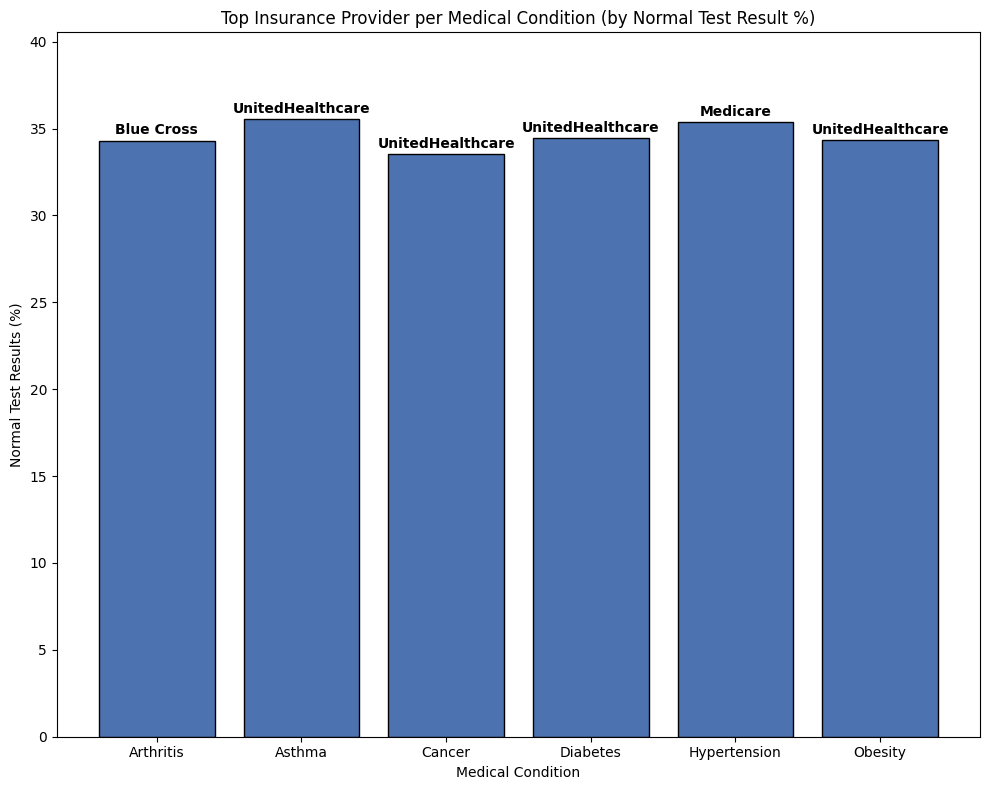

In [194]:
# FINAL VISUALISATION: Top Medical Condition per Insurance Provider under Normal Test Results
winners_df = pd.DataFrame(winners)
#sns.barplot(data = winners, x = 'Medical Condition', y = 'Percentage')
plt.figure(figsize=(10, 8))
bars = plt.bar(
    winners['Medical Condition'],
    winners['Percentage'],
    color='#4C72B0',
    edgecolor='black',
    linewidth=1
)
# Label bars with winning medical condition
for bar, condition in zip(bars, winners['Insurance Provider']):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1.0,
        condition,
        ha='center',
        va='top',
        color='black',
        fontsize=10,
        fontweight='bold'
    )


plt.ylabel('Normal Test Results (%)')
plt.xlabel('Medical Condition')
plt.title('Top Insurance Provider per Medical Condition (by Normal Test Result %)')
plt.ylim(0, winners['Percentage'].max() + 5)
plt.tight_layout()
plt.show()

Weighted by patient volume: A 100% normal rate for 2 patients is less meaningful than 80% for 200 patients. Could compute a weighted score:

In [195]:
import pandas as pd

# Group by provider & condition
provider_condition = (
    df.groupby(['Insurance Provider', 'Medical Condition'])
      .agg(
          normal_count=('Test Results', lambda x: (x=='Normal').sum()),
          total_patients=('Test Results', 'count')
      )
      .reset_index()
)

# Compute Normal % and Weighted Benefit
provider_condition['normal_pct'] = (provider_condition['normal_count'] / provider_condition['total_patients']) * 100
provider_condition['weighted_benefit'] = provider_condition['normal_pct'] * provider_condition['total_patients']

# Sort for easy reading
provider_condition = provider_condition.sort_values(['Medical Condition', 'weighted_benefit'], ascending=[True, False])

provider_condition.tail(20)  # Inspect top 20 rows


,Insurance Provider,Medical Condition,normal_count,total_patients,normal_pct,weighted_benefit
0,Aetna,Diabetes,1,1,100.0,100.0
1,Blue Cross,Diabetes,1,1,100.0,100.0
2,Cigna,Diabetes,1,1,100.0,100.0
3,Medicare,Diabetes,1,1,100.0,100.0
4,UnitedHealthcare,Diabetes,1,1,100.0,100.0


In [197]:
# Pivot to have Insurance as columns for easier comparison
condition_pivot = test_result_pct[test_result_pct['Test Results'] == 'Normal'].set_index(['Medical Condition', 'Insurance Provider'])['Percentage'].unstack('Insurance Provider')
condition_pivot.head()

Insurance Provider,Aetna,Blue Cross,Cigna,Medicare,UnitedHealthcare
Medical Condition,,,,,
Arthritis,31.02,34.30,32.98,31.99,32.42
Asthma,33.26,34.47,34.71,33.22,35.54
Cancer,33.28,32.68,32.11,33.50,33.53
Diabetes,32.77,32.88,32.64,33.37,34.46
Hypertension,34.59,34.50,32.56,35.38,32.69


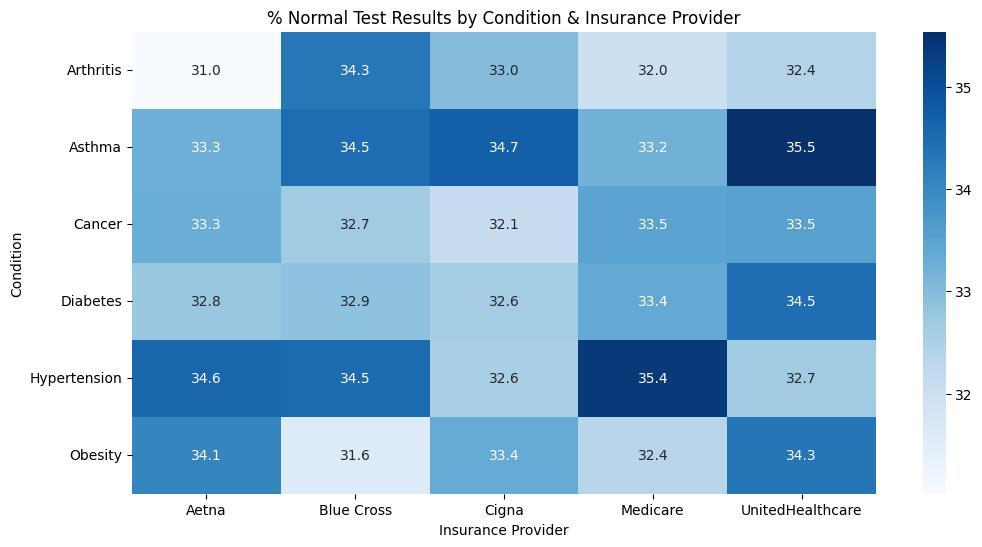

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(condition_pivot, annot=True, fmt=".1f", cmap='Blues')
plt.title('% Normal Test Results by Condition & Insurance Provider')
plt.ylabel('Condition')
plt.xlabel('Insurance Provider')
plt.show()


In [153]:
sorted_ins_per = normal_pct.sort_values(by=['Insurance Provider', 'Percentage'], ascending=[True,False])
sorted_ins_per

,Insurance Provider,Medical Condition,Test Results,Percentage
12,Aetna,Hypertension,Normal,34.59
15,Aetna,Obesity,Normal,34.06
7,Aetna,Cancer,Normal,33.28
5,Aetna,Asthma,Normal,33.26
11,Aetna,Diabetes,Normal,32.77
2,Aetna,Arthritis,Normal,31.02
30,Blue Cross,Hypertension,Normal,34.50
21,Blue Cross,Asthma,Normal,34.47
18,Blue Cross,Arthritis,Normal,34.30
29,Blue Cross,Diabetes,Normal,32.88


In [ ]:
summary = (
    condition_pivot   # rows = Condition, columns = Provider
    .agg(['mean', 'min', 'max'])
    .T
)
summary

,mean,min,max
Insurance Provider,,,
Aetna,33.163333,31.02,34.59
Blue Cross,33.408333,31.62,34.50
Cigna,33.058333,32.11,34.71
Medicare,33.301667,31.99,35.38
UnitedHealthcare,33.828333,32.42,35.54


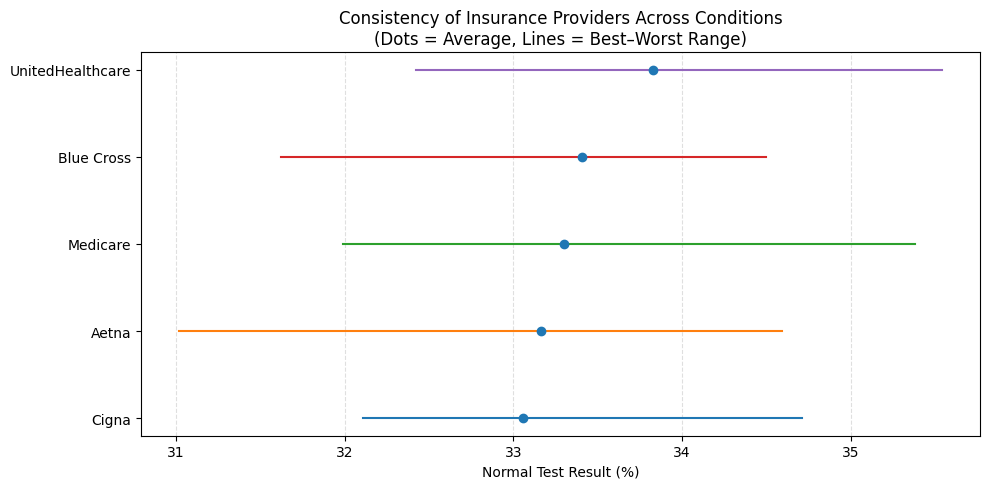

In [202]:
# Sort providers by average performance (highest first)
summary_sorted = summary.sort_values(by='mean', ascending=True)

providers = summary_sorted.index
means = summary_sorted['mean'].values
mins = summary_sorted['min'].values
maxs = summary_sorted['max'].values

y = range(len(providers))

plt.figure(figsize=(10,5))

# Range lines
for i in y:
    plt.plot([mins[i], maxs[i]], [i, i])

# Mean dots
plt.scatter(means, y, zorder=3)

plt.yticks(y, providers)
plt.xlabel('Normal Test Result (%)')
plt.title(
    'Consistency of Insurance Providers Across Conditions\n'
    '(Dots = Average, Lines = Best–Worst Range)'
)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(14, 6))

ax = sns.pointplot(
    data=normal_pct,
    x="Medical Condition",
    y="Percentage",
    hue="Insurance Provider",
    dodge=0.5,
    markers="o",
    linestyles=""
)

# Add vertical separators between categories
num_categories = normal_pct["Medical Condition"].nunique()
for i in range(num_categories - 1):
    ax.axvline(i + 0.5, color="lightgrey", linestyle="--", linewidth=1, zorder=0)

plt.title("Normal Test Results (%) by Medical Condition and Insurance Provider")
plt.ylabel("Percentage (%)")
plt.xlabel("Medical Condition")
plt.xticks(rotation=30)
plt.legend(title="Insurance Provider", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()


In [205]:
test_result_pct['Test Results'].unique()

array(['Abnormal', 'Inconclusive', 'Normal'], dtype=object)

In [207]:
normal_sorted = normal_pct.sort_values(
    by=['Medical Condition', 'Percentage'],
    ascending=[True, False]
)


In [209]:
top2 = (
    normal_sorted
    .groupby('Medical Condition')
    .head(2)
    .reset_index(drop=True)
)
top2

,index,Insurance Provider,Medical Condition,Test Results,Percentage
0,18,Blue Cross,Arthritis,Normal,34.30
1,37,Cigna,Arthritis,Normal,32.98
2,75,UnitedHealthcare,Asthma,Normal,35.54
3,39,Cigna,Asthma,Normal,34.71
4,79,UnitedHealthcare,Cancer,Normal,33.53
5,61,Medicare,Cancer,Normal,33.50
6,81,UnitedHealthcare,Diabetes,Normal,34.46
7,64,Medicare,Diabetes,Normal,33.37
8,66,Medicare,Hypertension,Normal,35.38
9,12,Aetna,Hypertension,Normal,34.59


In [242]:
import pandas as pd

# Filter only "Normal" test results if not already done
df = test_result_pct[test_result_pct['Test Results'] == 'Normal']

# Sort so highest % comes first within each condition
df_sorted = (
    df.sort_values(
        ['Medical Condition', 'Percentage'],
        ascending=[True, False]
    )
)

# Take top 2 providers per condition
top2 = df_sorted.groupby('Medical Condition').head(2)

# Build summary table
result = (
    top2
    .groupby('Medical Condition')
    .apply(lambda x: pd.Series({
        'Best Provider': x.iloc[0]['Insurance Provider'],
        'Best %': x.iloc[0]['Percentage'],
        '2nd Best Provider': x.iloc[1]['Insurance Provider'],
        '2nd Best %': x.iloc[1]['Percentage'],
        'Gap': x.iloc[0]['Percentage'] - x.iloc[1]['Percentage']
    }))
    .reset_index()
)

result


C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\3819669502.py:21: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Medical Condition,Best Provider,Best %,2nd Best Provider,2nd Best %,Gap
0,Arthritis,Blue Cross,34.30,Cigna,32.98,1.32
1,Asthma,UnitedHealthcare,35.54,Cigna,34.71,0.83
2,Cancer,UnitedHealthcare,33.53,Medicare,33.50,0.03
3,Diabetes,UnitedHealthcare,34.46,Medicare,33.37,1.09
4,Hypertension,Medicare,35.38,Aetna,34.59,0.79
5,Obesity,UnitedHealthcare,34.33,Aetna,34.06,0.27


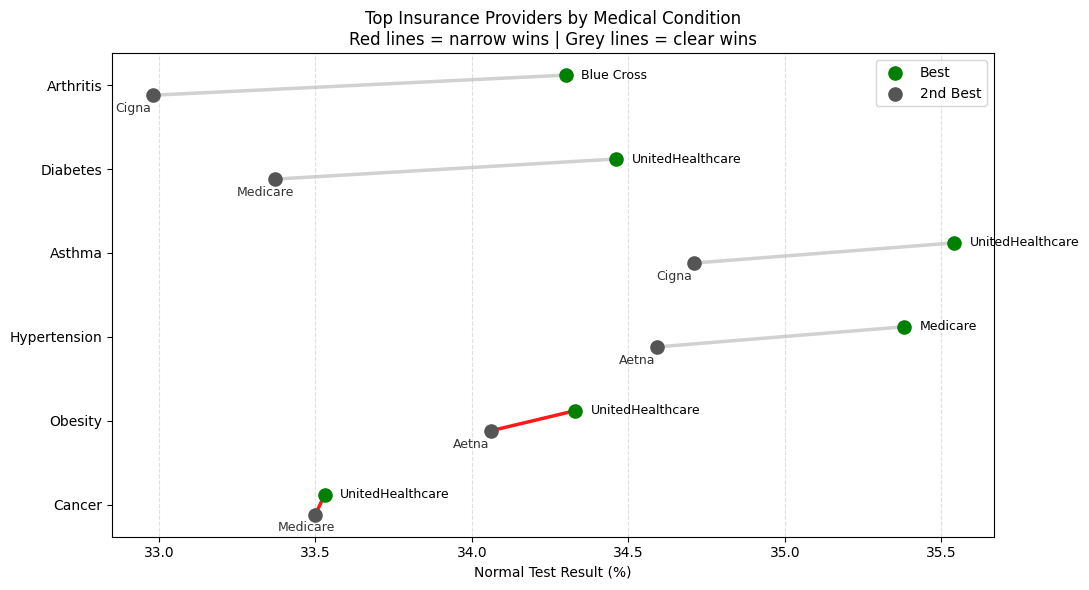

In [241]:
import matplotlib.pyplot as plt
import numpy as np

# Sort by smallest gap (narrow wins at top)
plot_df = result.sort_values('Gap').reset_index(drop=True)

y = np.arange(len(plot_df))

# Threshold for "narrow win"
NARROW_GAP_THRESHOLD = 0.5

# Vertical spacing
OFFSET = 0.12
LABEL_GAP = 0.08

plt.figure(figsize=(11, 6))

# --- Dumbbell lines (centered between dots) ---
for i in y:
    gap = plot_df.loc[i, 'Gap']

    line_color = 'red' if gap <= NARROW_GAP_THRESHOLD else '#cccccc'

    plt.plot(
        [plot_df.loc[i, '2nd Best %'], plot_df.loc[i, 'Best %']],  # x-values
        [i - OFFSET, i + OFFSET],  # y-values: line between the dots
        color=line_color,
        linewidth=2.5,
        alpha=0.9,
        zorder=1
    )

# --- Best dots (above) ---
plt.scatter(
    plot_df['Best %'],
    y + OFFSET,
    color='green',
    s=90,
    zorder=3,
    label='Best'
)

# --- 2nd Best dots (below) ---
plt.scatter(
    plot_df['2nd Best %'],
    y - OFFSET,
    color='#555555',
    s=90,
    zorder=3,
    label='2nd Best'
)

# --- Provider labels (Best) ---
for i in y:
    plt.text(
        plot_df.loc[i, 'Best %'] + 0.05,
        i + OFFSET,
        plot_df.loc[i, 'Best Provider'],
        va='center',
        fontsize=9
    )

# --- Provider labels (2nd Best BELOW marker) ---
for i in y:
    plt.text(
        plot_df.loc[i, '2nd Best %'] - 0.12,
        i - OFFSET - LABEL_GAP,
        plot_df.loc[i, '2nd Best Provider'],
        va='top',
        fontsize=9,
        color='#333333'
    )

# --- Axes & titles ---
plt.yticks(y, plot_df['Medical Condition'])
plt.xlabel('Normal Test Result (%)')
plt.title(
    'Top Insurance Providers by Medical Condition\n'
    'Red lines = narrow wins | Grey lines = clear wins'
)

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


### **4. Modeling Readiness**

The suitability of the dataset for predictive modeling was assessed following univariate and bivariate analysis. Across most categorical features including medical conditions, admission types, and demographic variables-outcome distributions were observed to be close to uniform.

Additionally, key outcome subsets (abnormal, inconclusive rates and negative billing amounts) represent a relatively small proportion of the data. These characteristics result in a low signal-to-noise ratio, where predictive models would be driven primarily by random variation rather than meaningful patterns.

### **5. Key Insights & Takeaways**

- No medical condition or admission type disproportionately drives abnormal outcomes

- Outcome distributions are broadly uniform, limiting segmentation‑based interventions

- Negative billing amounts are rare

- The dataset is well‑suited for descriptive insights, but not for predictive modeling without additional data enrichment.